In [388]:
%%time 

import pandas as pd
import geocoder
import numpy as np
import os
import json
import datetime 
import matplotlib.pyplot as plt


CPU times: user 147 µs, sys: 260 µs, total: 407 µs
Wall time: 550 µs


In [389]:
def is_tweet_matching_annotation(tweet_annotations,tweet_prop_config):
    '''Given Set of annotaions and '''
    return True
    # matches_correct_prop:
    for key in tweet_prop_config.keys():
        if tweet_annotations[key]['label'] not in tweet_prop_config[key]:
            return False
    return True


In [390]:
tweet_labels = ['flu_annotator', 'decision_type_who', 'flu_vaccine_received', 'location', 'sentiment', 
 'decision_type_sentiment_nonneutral', 'flu_vaccine_sentiment', 'vaccine_annotator', 
 'flu_vaccine_intent_to_receive', 'flu_vaccine_relevant', 'who', 
 'relevant', 'decision_type_relevant', 'decision_type_sentiment']




# Possible tweet configs
### Link to dcoument for label reference -->https://bitbucket.org/mdredze/falconet/src/master/README.data.md

    1. ['flu_vaccine_relevant']=[True]
    2. ['flu_vaccine_received'] = [True]
    3.  ['flu_vaccine_relevant']=[True] and ['flu_vaccine_intent_to_receive']=[True]

In [420]:
%%time 
tweet_prop_config={}

tweet_prop_config['flu_vaccine_relevant']=[True]
tweet_prop_config['flu_vaccine_intent_to_receive']=[True]

curr_dir = 'mined_tweets/output_dir/tweets/'
years_dirs=[curr_dir+'201'+str(i)+'/' for i in range(2,8)]
trends_count = {}
for year_d in years_dirs:
    year = year_d[-5:-1]
    trends_count[year]={}
    months  = os.listdir(year_d)
    if '.DS_Store' in months:
        months.remove('.DS_Store')
    for month_num in months:
        for tweet_file in sorted(os.listdir(year_d+month_num)):
            day = tweet_file[:10]
            with open(year_d+month_num+'/'+tweet_file,'r') as f:
                for line in f:
                    t_d = json.loads(line)
                    if 'location' in t_d['annotations'] and \
                        t_d['annotations']['location']['country']=='United States':
                        state = t_d['annotations']['location']['state']
                        # print(tweet_file)
                        if state!='':
                            if state not in trends_count[year]:
                                trends_count[year][state]={}
                                #print(f_name)
                            if is_tweet_matching_annotation(t_d['annotations'],tweet_prop_config):
                                if day in trends_count[year][state]:
                                    trends_count[year][state][day]+=1
                                else:
                                    trends_count[year][state][day]=1

                    
         
                        
      
        
print('line read and check time')        

line read and check time
CPU times: user 1min 11s, sys: 6 s, total: 1min 17s
Wall time: 1min 39s


In [392]:
year = '2017'
total_count = 0
for state in trends_count[year]:
    for date in trends_count[year][state]:
        total_count+=trends_count[year][state][date]
total_count

136951

In [406]:
val_list = []
for year,year_item in trends_count.items():
    for state,state_item in year_item.items():
        for date,count in state_item.items():
            list_el = {}
            list_el['state']=state
            list_el['date']=date
            list_el['count']=count
            list_el['year']=year
            val_list.append(list_el)
        
        

In [434]:
flu_vaccine_relevant_received_df = pd.DataFrame(val_list)
flu_vaccine_relevant_received_df.to_csv("mined_trends/flu_vaccine_relevant_recieved_intent_to_receive.csv")

In [433]:
flu_vaccine_relevant_received_df[(flu_vaccine_relevant_received_df['year']=='2014')  &
                                 (flu_vaccine_relevant_received_df['state']=='Florida')]

,count,date,state,year
31185,8,2014_03_01,Florida,2014
31186,5,2014_03_02,Florida,2014
31187,11,2014_03_03,Florida,2014
31188,13,2014_03_04,Florida,2014
31189,4,2014_03_05,Florida,2014
31190,6,2014_03_06,Florida,2014
31191,6,2014_03_07,Florida,2014
31192,5,2014_03_08,Florida,2014
31193,5,2014_03_09,Florida,2014
31194,3,2014_03_10,Florida,2014


In [419]:
flu_vaccine_received_df

,count,date,state,year
0,5,2012_03_01,Louisiana,2012
1,8,2012_03_02,Louisiana,2012
2,1,2012_03_03,Louisiana,2012
3,4,2012_03_04,Louisiana,2012
4,2,2012_03_08,Louisiana,2012
5,4,2012_03_09,Louisiana,2012
6,2,2012_03_10,Louisiana,2012
7,3,2012_03_13,Louisiana,2012
8,1,2012_03_14,Louisiana,2012
9,1,2012_03_18,Louisiana,2012


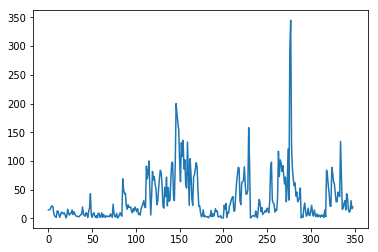

In [387]:
vals = [x for _,x in trends_count['2015']['New York'].items()]
plt.plot(vals)

In [269]:
if 'location' in t_d['annotations']:


SyntaxError: invalid syntax (<ipython-input-269-e36f91de6724>, line 1)

In [79]:
years_dir

['mined_tweets/output_dir/tweets/2011',
 'mined_tweets/output_dir/tweets/2012',
 'mined_tweets/output_dir/tweets/2013',
 'mined_tweets/output_dir/tweets/2014',
 'mined_tweets/output_dir/tweets/2015',
 'mined_tweets/output_dir/tweets/2016',
 'mined_tweets/output_dir/tweets/2017']

In [22]:
for x in 

SyntaxError: invalid syntax (<ipython-input-22-eaf083cb72bb>, line 1)